In [1]:
#########################
##                     ##
## Irving Gomez Mendez ##
##     May 04, 2021    ##
##                     ##
#########################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [3]:
# Example from:
# Tarling, R. (2009) Statistical modelling for social researchers.
dat = pd.read_spss('BritishCrimeSurvey2000.sav')

In [4]:
#rowlabel	Serial: Full serial Number/Rowlabel

#rubbcomm	How common - litter or rubbish lying around in the immediate area
#vandcomm	How common - vandalism, graffiti or deliberate damage to property
#poorhou	How common - homes in poor conditions
#         1 = "Very commom"
#         2 = "Fairly commom"
#         3 = "Not very commom"
#         4 = "Not at all commom"
#         8 = "Refusal"
#         9 = "Don't know"

#sex	  	Sex (1="Male", 2="Female")

#agegrp		Age (grouped)
#         1 = "16-19"
#         2 = "20-24"
#         3 = "25-34"
#         4 = "35-44"
#         5 = "45-54"
#         6 = "55-64"
#         7 = "65-74"
#         8 = "75-84"
#         9 = "85-over"
#         998 = "Refusal"
#         999 = "Don't know"

#marst	  Marital status
#         1 = "Single, that is, never married"
#         2 = "Married & living with HusbWife"
#         3 = "Married & separated from HusbWife"
#         4 = "Divorced"
#         5 = "Widowed"
#         8 = "Refusal"
#         9 = "Don't know"

#educat2	Highest educational qualification
#         1 = Higher degree/postgraduate qualification
#         2 = First degree (incl. B.Ed); Postgraduate
#         3 = Diplomas in higher education/other H.E.
#         4 = A/AS levels/SCE Higher/Scottish Certific
#         5 = Trade Apprenticeships
#         6 = O level/GCSE grade A-C/SCE Standard/Ordi
#         7 = O level/GCSE grade D-G/SCE Standard/Ordi
#         8 = Other qualifications (incl. overseas)
#         98 = Refusal
#         99 = Don't know

#sc2	    Social class
#         0.0 = Not classified
#         1.0 = Professional 3,4
#         2.0 = Managerial 1,2,13
#         3.1 = Skilled Non-Manual 5,6
#         3.2 = Skilled Manual 8,9,12,14
#         4.0 = Semi skilled 7,10,15
#         5.0 = Unskilled 11
#         6.0 = Armed Forces

#yrsarea	How long lived in this area
#yrsaddr	How long lived at this address
#         1 = less than 12 months
#         2 = 12 months but less than 2 years
#         3 = 2 years but less than 3 years
#         4 = 3 years but less than 5 years
#         5 = 5 years but less than 10 years
#         6 = 10 years but less than 20 years
#         7 = 20 years or longer
#         8 = Refusal
#         9 = Don't know

#wcarstol	Worried about having the car stolen
#wfromcar	Worried about having things stolen from the car
#         1 = "Very worried"
#         2 = "Fairly worried"
#         3 = "Not very worried"
#         4 = "Not at all worried"
#         5 = "(Not applicable)"
#         8 = "Refusal"
#         9 = "Don't know"

#arealive	Respondent's view about this area as place to live in
#         1 = "A very good place tolive"
#         2 = "A fairly good place to live"
#         3 = "Neither good nor bad"
#         4 = "A fairly bad place to live"
#         5 = "A very bad place to live"
#         8 = "Refusal"
#         9 = "Don't know"

#region		Standard Region
#         1 = "North"
#         2 = "Yorks & Humberside"
#         3 = "North West"
#         4 = "East Midlands"
#         5 = "West Midlands"
#         6 = "East Anglia"
#         7 = "Greater London"
#         8 = "South East"
#         9 = "South West"
#         10 = "Wales"
#         11 = "Scotland"

#weighta	To be used when analyzing individual-level data from core sample
#weightb	To be used when analyzing household-level data from core sample

#victcar	Victim of car crime
#         0 = "Not victim car crime"
#         1 = "Victim car crime"

#agegrpr	Age recoded
#         1 = "16-44"
#         2 = "45-54"
#         3 = "55 - over"

#numcarr	Number of cars recoded
#         1 = 1
#         2 = 2arealive
#         3 = 3
#         4 = 4 or more

#ethnicr	Ethnic group recoded
#         1 = White
#         2 = BME = Black or minority ethnicity

#tenurer	Accommodation recoded
#         1 = "Owner"
#         2 = "Rented ocuppied"

In [5]:
# Find rows with missing values
dat = dat[~dat.isnull().any(axis=1)]
dat = dat.reset_index(drop=True)

X = dat[['rubbcomm', 'vandcomm', 'poorhou', 'sex', 'agegrp', 'marst',
       'educat2', 'sc2', 'yrsarea', 'yrsaddr', 'arealive', 'region',
       'numcarr', 'ethnicr', 'tenurer']]

y = dat['victcar']

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
enc.categories_

[array(['Fairly common', 'Not at all common', 'Not very common',
        'Very common'], dtype=object),
 array(['Fairly common', 'Not at all common', 'Not very common',
        'Very common'], dtype=object),
 array(['Fairly common', 'Not at all common', 'Not very common',
        'Very common'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['16-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65-74',
        '75-84', '85 and over'], dtype=object),
 array(['Divorced', 'Married and living with HusbWife',
        'Married and separated from HusbWife',
        'Single, that is, never married', 'Widowed'], dtype=object),
 array(['A/AS levels/SCE Higher/Scottish Certific',
        'Diplomas in higher education/other H.E.',
        'First degree (incl. B.Ed); Postgraduate',
        'Higher degree/postgraduate qualification',
        'O level/GCSE grade A-C/SCE Standard/Ordi',
        'O level/GCSE grade D-G/SCE Standard/Ordi',
        'Other qualifications (incl. overseas

In [6]:
X_with_dummies = enc.transform(X)

# Logistic Regression
logreg = LogisticRegression(penalty='none', multi_class='multinomial',
    solver='lbfgs', verbose=2, # output progress
    n_jobs=4) # parallelize over 4 processes)
logreg.fit(X_with_dummies,y)

confusion_matrix = metrics.confusion_matrix(y_true = y,
    y_pred = logreg.predict(X_with_dummies))
accuracy_reg_log = logreg.score(X_with_dummies, y)
accuracy_reg_log

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          164     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93286D+03    |proj g|=  2.56800D+03

At iterate    1    f=  5.45079D+03    |proj g|=  2.83541D+02

At iterate    2    f=  5.42277D+03    |proj g|=  2.86386D+02

At iterate    3    f=  5.26638D+03    |proj g|=  3.01843D+02

At iterate    4    f=  5.19533D+03    |proj g|=  2.60492D+02

At iterate    5    f=  5.05465D+03    |proj g|=  1.37857D+02

At iterate    6    f=  4.99223D+03    |proj g|=  8.67985D+01

At iterate    7    f=  4.95416D+03    |proj g|=  8.02973D+01

At iterate    8    f=  4.92394D+03    |proj g|=  4.54339D+01

At iterate    9    f=  4.89916D+03    |proj g|=  2.97850D+01

At iterate   10    f=  4.88423D+03    |proj g|=  3.27118D+01

At iterate   11    f=  4.87701D+03    |proj g|=  1.42930D+01

At iterate   12    f=  4.87288D+03    |proj g|=  4.23845D+01

At iterate   13    f=  4.8

 This problem is unconstrained.



At iterate   45    f=  4.86197D+03    |proj g|=  9.97982D-01

At iterate   46    f=  4.86195D+03    |proj g|=  1.68281D+00

At iterate   47    f=  4.86194D+03    |proj g|=  2.39612D+00

At iterate   48    f=  4.86193D+03    |proj g|=  1.73233D+00

At iterate   49    f=  4.86190D+03    |proj g|=  1.72092D+00

At iterate   50    f=  4.86189D+03    |proj g|=  1.27810D+00

At iterate   51    f=  4.86187D+03    |proj g|=  4.37150D+00

At iterate   52    f=  4.86186D+03    |proj g|=  1.82698D+00

At iterate   53    f=  4.86185D+03    |proj g|=  1.35514D+00

At iterate   54    f=  4.86184D+03    |proj g|=  1.32823D+00

At iterate   55    f=  4.86180D+03    |proj g|=  2.83806D+00

At iterate   56    f=  4.86177D+03    |proj g|=  1.48882D+00

At iterate   57    f=  4.86176D+03    |proj g|=  1.15444D+00

At iterate   58    f=  4.86172D+03    |proj g|=  1.84660D+00

At iterate   59    f=  4.86171D+03    |proj g|=  1.18167D+00

At iterate   60    f=  4.86169D+03    |proj g|=  7.16716D-01

At iter

/home/dmitri/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.2s finished


0.7623475304939012

Text(0.5, 1.0, 'Accuracy Score: 0.7623')

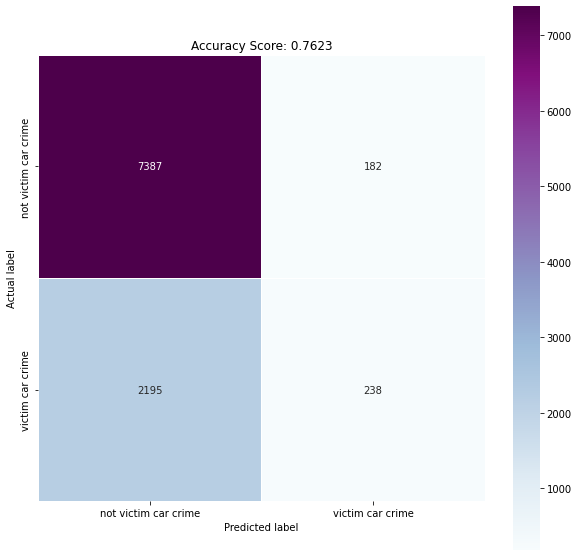

In [7]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=True,
            linewidths=.5, square = True, cmap='BuPu', fmt='g', ax=ax)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.yaxis.set_ticklabels(y.unique())
ax.xaxis.set_ticklabels(y.unique())
plt.title('Accuracy Score: {0}'.format(round(accuracy_reg_log,4)))

In [8]:
X.iloc[0,]

rubbcomm                          Not at all common
vandcomm                            Not very common
poorhou                           Not at all common
sex                                            Male
agegrp                                        25-34
marst                Single, that is, never married
educat2     First degree (incl. B.Ed); Postgraduate
sc2                        Skilled Manual 8,9,12,14
yrsarea                         less than 12 months
yrsaddr                         less than 12 months
arealive                  A very good place to live
region                                   South East
numcarr                                           1
ethnicr                                       white
tenurer                                      rented
Name: 0, dtype: object

In [9]:
ttt = np.array(X.iloc[0,])
ttt_trans = enc.transform(ttt[:,None].T)
logreg.predict(ttt_trans)

/home/dmitri/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array(['not victim car crime'], dtype=object)